In [2]:
import pandas as pd
import numpy as np
from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import os
os.chdir('/Users/sosuke/Downloads')
from pca import pca

In [3]:
# Colnames of the data set
col_1 =["Country","100m","200m","400m","800m","1500m","3000m","Marathon"]

# Data set
df1 = pd.read_table('p1.txt', names = col_1)

It does not really make sense to take the mean of the country column, so we exclude the column and calculate the mean vector for the rest of the columns.

The sample mean vector, $\bar{x}$, is given as

In [180]:
mean_vec = np.dot(np.transpose(df1.loc[:, "100m":"Marathon"]), np.ones(len(df1)))/len(df1)

In [181]:
np.round(mean_vec, decimals=2)

array([ 11.36,  23.12,  51.99,   2.02,   4.19,   9.08, 153.59])

The sample covariance is given as

In [182]:
mean_centered = df1.loc[:, "100m":"Marathon"] - np.outer(np.ones(len(df1)), mean_vec)
cov = np.dot(np.transpose(mean_centered), mean_centered)/(len(df1) - 1)

In [184]:
np.round(cov, decimals=2)

array([[1.6000e-01, 3.4000e-01, 8.9000e-01, 3.0000e-02, 9.0000e-02,
        2.3000e-01, 4.3600e+00],
       [3.4000e-01, 8.6000e-01, 2.2000e+00, 7.0000e-02, 2.1000e-01,
        5.5000e-01, 1.0440e+01],
       [8.9000e-01, 2.2000e+00, 6.7600e+00, 1.8000e-01, 5.2000e-01,
        1.4300e+00, 2.9030e+01],
       [3.0000e-02, 7.0000e-02, 1.8000e-01, 1.0000e-02, 2.0000e-02,
        6.0000e-02, 1.2200e+00],
       [9.0000e-02, 2.1000e-01, 5.2000e-01, 2.0000e-02, 1.0000e-01,
        2.4000e-01, 3.2700e+00],
       [2.3000e-01, 5.5000e-01, 1.4300e+00, 6.0000e-02, 2.4000e-01,
        6.6000e-01, 1.0730e+01],
       [4.3600e+00, 1.0440e+01, 2.9030e+01, 1.2200e+00, 3.2700e+00,
        1.0730e+01, 2.7105e+02]])

The sample correlation matrix is given as

In [141]:
cor = np.dot(np.dot(np.diag(np.power(cov.diagonal(), -0.5)), cov),np.diag(np.power(cov.diagonal(), -0.5)))
np.round(cor, decimals=2)

array([[1.  , 0.94, 0.87, 0.81, 0.71, 0.73, 0.67],
       [0.94, 1.  , 0.91, 0.82, 0.72, 0.73, 0.68],
       [0.87, 0.91, 1.  , 0.81, 0.64, 0.67, 0.68],
       [0.81, 0.82, 0.81, 1.  , 0.8 , 0.87, 0.85],
       [0.71, 0.72, 0.64, 0.8 , 1.  , 0.95, 0.63],
       [0.73, 0.73, 0.67, 0.87, 0.95, 1.  , 0.8 ],
       [0.67, 0.68, 0.68, 0.85, 0.63, 0.8 , 1.  ]])

The eigenvalues and the eigenvectors for the sample correlation matrix are

In [144]:
eigval, eigvec = np.linalg.eig(cor)
eigval, eigvec

(array([5.66296523, 0.64544415, 0.40511611, 0.01538882, 0.05200208,
        0.12707124, 0.09201236]),
 array([[-0.38338846, -0.38061252,  0.16230878,  0.04067737, -0.54364698,
         -0.60096141, -0.15310766],
        [-0.3882385 , -0.39338927,  0.14542183, -0.11235087,  0.78178128,
         -0.2023648 ,  0.09280102],
        [-0.37281968, -0.46500155, -0.04030057,  0.03196405, -0.26774493,
          0.68451415,  0.31919625],
        [-0.39795681,  0.12016153, -0.22474391, -0.07717318,  0.06193493,
          0.26821281, -0.83363782],
        [-0.36383253,  0.43811047,  0.5427808 ,  0.60600203,  0.04096156,
          0.08840911,  0.06589106],
        [-0.38350493,  0.46976459,  0.15284774, -0.7245462 , -0.12212375,
         -0.01692904,  0.26213501],
        [-0.35421728,  0.23894391, -0.76315199,  0.2941761 ,  0.03392112,
         -0.22202113,  0.31313154]]))

The sum of the eigenvalues is given as 

In [522]:
sum(eigval)

6.9999999999999964

The firt principal component is given by the eigenvector corresponding to the largest eigenvalue, i.e.

$PC1 = -0.38 \ 100m -0.39 \ 200m - 0.37 \ 400m - 0.40 \ 800m -0.36 \ 1500m - 0.38 \ 3000m - 0.35 \ Marathon$

In [160]:
eigvec[:, 0]

array([-0.38338846, -0.3882385 , -0.37281968, -0.39795681, -0.36383253,
       -0.38350493, -0.35421728])

Similarly, the second principal component is

$PC2 = -0.38 \ 100m -0.39 \ 200m - 0.47 \ 400m + 0.12 \ 800m +0.44 \ 1500m + 0.47 \ 3000m + 0.24 \ Marathon$

Note that all the variables are standardized, i.e. mean centered and scaled by the standard deviation.

We can see that the weights of the first two variables are very similar in the two principal components.
The weight for the third variable is similar but a little different.
The weights for the last four variables are very different between the principal components, since the signs are the opposite.


The percentages of total sample variation explained by the first two principal components are given by
$$ \frac{\lambda_1 + \lambda_2}{\lambda_1 + \lambda_2 + \cdots + \lambda_7}$$

In [525]:
sum(eigval[0:2])/sum(eigval)

0.9012013400106833

This gives us 90.12%.

In [526]:
Q1 = np.dot(eigvec[:, 0], np.transpose(np.dot(mean_centered, np.diag(np.power(cov.diagonal(), -0.5)))))

In [527]:
Q2 = np.dot(eigvec[:, 1], np.transpose(np.dot(mean_centered, np.diag(np.power(cov.diagonal(), -0.5)))))

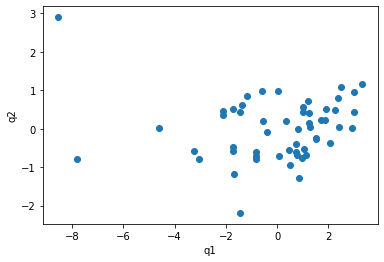

In [528]:
plt.scatter(Q1, Q2)
plt.xlabel('q1')
plt.ylabel('q2')
plt.show()

In [529]:
df1['PC1'] = Q1

In [530]:
df1.sort_values(by="PC1", ascending=False)

,Country,100m,200m,400m,800m,1500m,3000m,Marathon,PC1
53,USA,10.49,21.34,48.70,1.94,3.95,8.43,139.60,3.320546
17,GER,10.81,21.71,47.60,1.92,3.96,8.51,141.45,3.014944
44,RUS,10.77,21.87,49.11,1.91,3.87,8.38,141.31,2.984682
8,CHN,10.79,22.01,49.81,1.93,3.84,8.10,139.39,2.922490
16,FRA,10.73,21.99,48.25,1.94,4.03,8.64,148.27,2.501999
18,GBR,11.10,22.10,49.43,1.94,3.97,8.37,135.25,2.403511
12,CZE,11.09,21.97,47.99,1.89,4.03,8.87,145.19,2.384548
41,POL,10.93,22.13,49.28,1.95,3.99,8.53,144.18,2.241500
43,ROM,11.30,22.35,49.88,1.92,3.90,8.36,142.50,2.061350
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51,1.903281


Therefore, the top 6 countries based on their scores on the first principal component are

In [531]:
df1.sort_values(by="PC1", ascending=False)["Country"][:6]

53    USA
17    GER
44    RUS
8     CHN
16    FRA
18    GBR
Name: Country, dtype: object

and the last three countries are

In [532]:
df1.sort_values(by="PC1")["Country"][:3]

45    SAM
10    COK
39    PNG
Name: Country, dtype: object

This ranking corresponds with athletic excellence since the top countries such as U.K., US, and Germany are always on top when it comes to running in Olympics, and small and undeveloped countries such as cook islands and papua new guienea come in the last. 